<a href="https://colab.research.google.com/github/JSEFERINO/CURSO5/blob/main/Lab14_Nathaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Laboratorio 14. Prueba de Normalidad de un conjunto de Datos**
## **Realizado por: Nathaly Martelo - T00081461**

In [ ]:
# @title **Paso 1. Nuestras Librerias**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit &>/dev/null
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

In [ ]:
# @title **Paso 2. La URL de mis datos en .csv**
url = 'https://raw.githubusercontent.com/JSEFERINO/ESTADISTICA-INFERENCIAL-2025/main/DATOS20510ULTIMOS.csv'

In [ ]:
# @title **Paso 3. Definimos nuestro DataFrame**
datos = pd.read_csv(url, delimiter=';') # Added delimiter

In [ ]:
# @title **Paso 4. LLamamos a los datos**
datos

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90,90,2.3,2.10,2314,F_NEGOCIOS,18,59,176,...,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO
70,PROBABILIDAD,85,95,2.0,3.10,2314,F_NEGOCIOS,18,60,171,...,BAJO,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO
71,ESTADISTICAI,65,75,1.7,2.95,1136,DERECHO,20,55,164,...,BAJO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO
72,ESTADISTICAI,100,100,2.3,3.20,2313,PSICOLOGÍA,19,67,171,...,BAJO,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO


In [ ]:
# @title **Paso 5. La columna de mis Datos**
datos.columns

Index(['CURSO', 'ASISTENCIA2', 'ASISTENCIA1', 'PARCIAL 1', 'PARCIAL 2', 'NRC',
       'PROGRAMA', 'EDAD', 'PESO', 'ESTATURA', 'SEXO', 'ESTADO_CIVIL',
       'ESTRATO', 'URBANO', 'TRANSPORTE', 'GR_SANGUINEO',
       ' A: Facilidad para aprender cosas nuevas', 'B: Memoria y atención',
       'C: Relacionar tu experiencias con lo que aprendes', 'D: Autoestima',
       'E: Actitud hacia el Aprendizaje', 'F: Ambiente Familiar para estudiar',
       'G: Ansiedad académica', 'H: Recursos Educativos',
       'I: Mentalidad para superar adversidades',
       'K: Regularidad en el estudio'],
      dtype='object')

In [ ]:
# @title **Paso 6. Convierte a NRC a object**

# Convert 'NRC' column to object type
datos['NRC'] = datos['NRC'].astype(object)
datos

,CURSO,ASISTENCIA2,ASISTENCIA1,PARCIAL 1,PARCIAL 2,NRC,PROGRAMA,EDAD,PESO,ESTATURA,...,A: Facilidad para aprender cosas nuevas,B: Memoria y atención,C: Relacionar tu experiencias con lo que aprendes,D: Autoestima,E: Actitud hacia el Aprendizaje,F: Ambiente Familiar para estudiar,G: Ansiedad académica,H: Recursos Educativos,I: Mentalidad para superar adversidades,K: Regularidad en el estudio
0,PROBABILIDAD,100,90,3.6,4.30,2314,F_NEGOCIOS,20,55,160,...,BAJO,ALTO,MEDIO,ALTO,ALTO,BAJO,BAJO,BAJO,ALTO,ALTO
1,ESTADISTICAI,70,75,0.9,2.50,1136,DERECHO,18,80,185,...,ALTO,ALTO,ALTO,ALTO,ALTO,ALTO,MEDIO,MEDIO,MEDIO,MEDIO
2,PROBABILIDAD,85,95,3.9,3.80,2314,F_NEGOCIOS,19,60,158,...,BAJO,BAJO,BAJO,BAJO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO,MEDIO
3,PROBABILIDAD,5,5,2.9,0.50,2314,MECANICA,18,72,181,...,MEDIO,ALTO,BAJO,MEDIO,MEDIO,ALTO,MEDIO,ALTO,MEDIO,MEDIO
4,ESTADISTICAI,20,70,3.7,0.55,1009,PSICOLOGÍA,19,45,163,...,ALTO,MEDIO,MEDIO,ALTO,ALTO,BAJO,MEDIO,BAJO,ALTO,BAJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,PROBABILIDAD,90,90,2.3,2.10,2314,F_NEGOCIOS,18,59,176,...,MEDIO,MEDIO,MEDIO,ALTO,ALTO,ALTO,ALTO,BAJO,ALTO,ALTO
70,PROBABILIDAD,85,95,2.0,3.10,2314,F_NEGOCIOS,18,60,171,...,BAJO,BAJO,ALTO,ALTO,ALTO,BAJO,ALTO,BAJO,ALTO,BAJO
71,ESTADISTICAI,65,75,1.7,2.95,1136,DERECHO,20,55,164,...,BAJO,MEDIO,MEDIO,ALTO,ALTO,ALTO,BAJO,BAJO,MEDIO,BAJO
72,ESTADISTICAI,100,100,2.3,3.20,2313,PSICOLOGÍA,19,67,171,...,BAJO,BAJO,BAJO,BAJO,MEDIO,BAJO,BAJO,BAJO,BAJO,BAJO


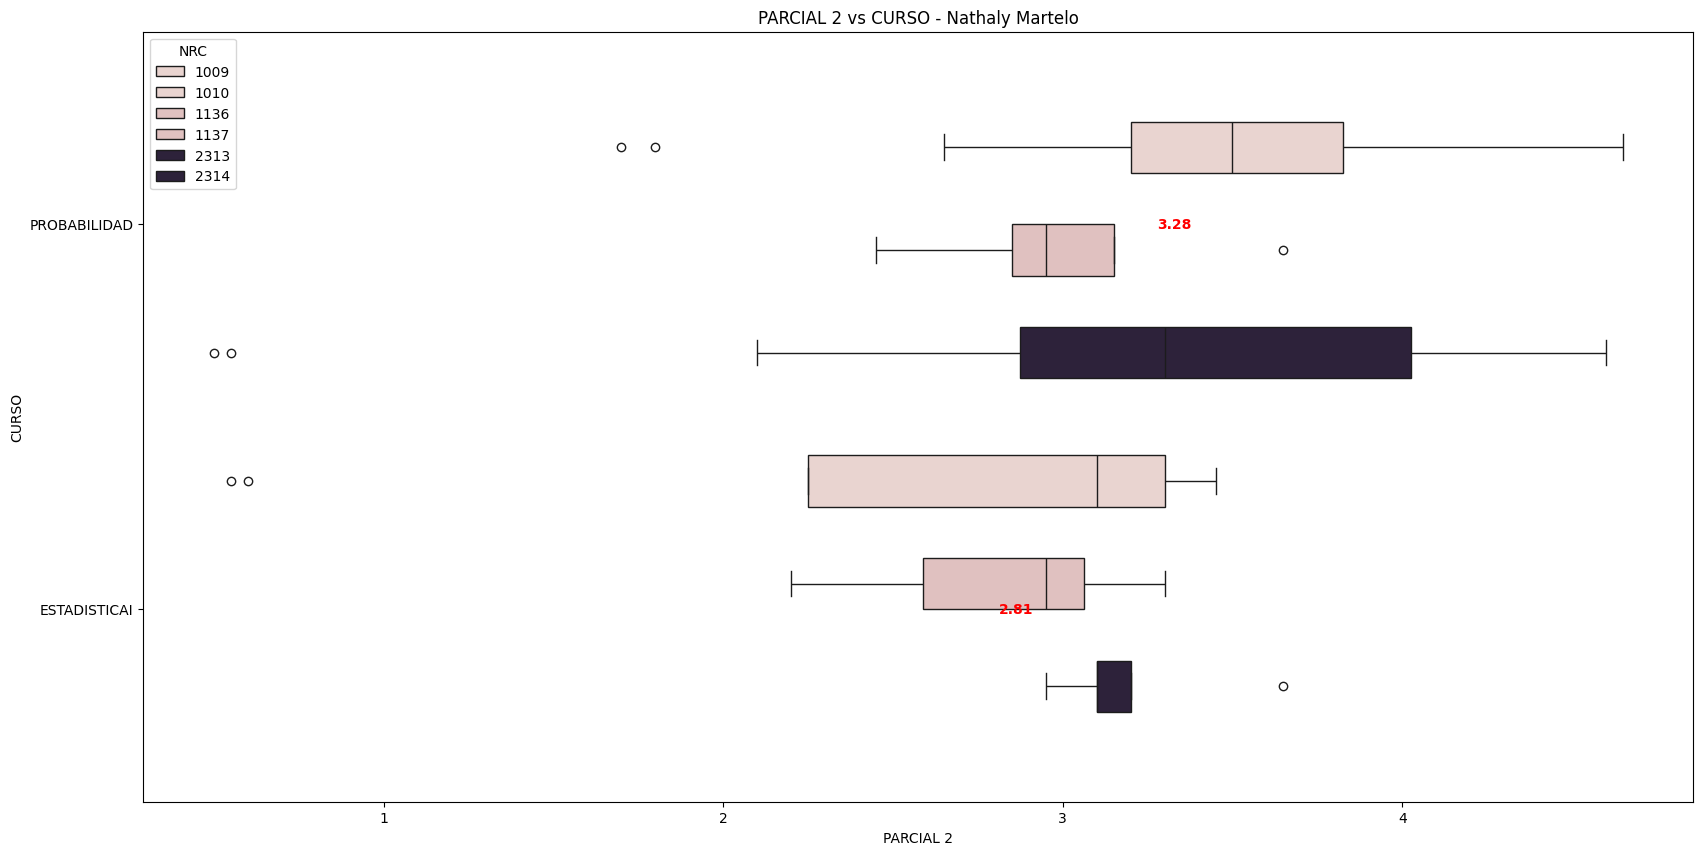

In [ ]:
# @title **Paso 7. Diagrama de caja y Bigotes**
fig, ax = plt.subplots(figsize=(20, 10)) # Changed from axs to ax
ax.set_title('PARCIAL 2 vs CURSO - Nathaly Martelo') # Now using ax instead of axs[0]
sns.boxplot(y="CURSO", x="PARCIAL 2", hue='NRC', data=datos, ax=ax) # Now using ax instead of axs[0]
# Calculate the mean for each group
mean_by_group = datos.groupby('CURSO')['PARCIAL 2'].mean()

# Add the mean values to the plot
# Filter out NaN values from unique courses
for i, asignatura in enumerate(datos['CURSO'].dropna().unique()):
    mean_value = mean_by_group[asignatura]
    ax.text(mean_value, i, f'{mean_value:.2f}', ha='left', va='center', color='red', fontweight='bold')

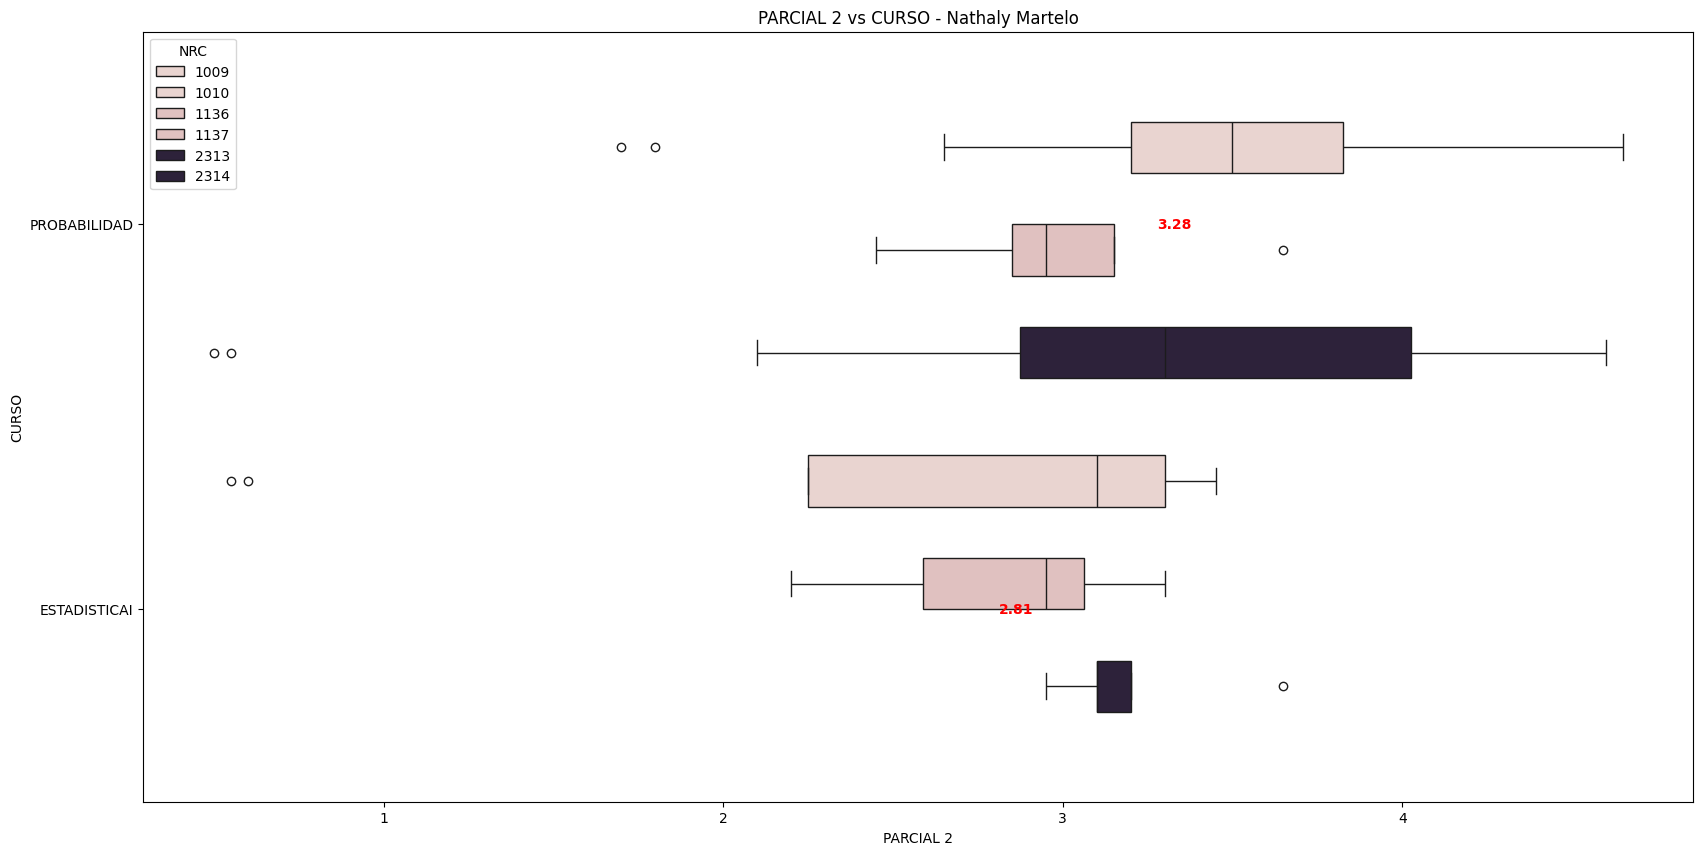

In [ ]:
# @title **Paso 8.  Diagrama de caja y Bigotes**
fig, ax = plt.subplots(figsize=(20, 10)) # Changed from axs to ax
ax.set_title('PARCIAL 2 vs CURSO - Nathaly Martelo') # Now using ax instead of axs[0]
sns.boxplot(y="CURSO", x="PARCIAL 2", hue='NRC', data=datos, ax=ax) # Now using ax instead of axs[0]
# Calculate the mean for each group
mean_by_group = datos.groupby('CURSO')['PARCIAL 2'].mean()

# Add the mean values to the plot
for i, asignatura in enumerate(datos['CURSO'].unique()):
  mean_value = mean_by_group[asignatura]
  ax.text(mean_value, i, f'{mean_value:.2f}', ha='left', va='center', color='red', fontweight='bold')

---
# **Pruebas de Normalidad**

### 🔹 **1. Prueba de Shapiro-Wilk**

* **Uso común** en muestras pequeñas (n < 50) pero también válida para muestras mayores.
* Es muy sensible a desviaciones de la normalidad.
* **Hipótesis nula (H₀)**: Los datos provienen de una distribución normal.

### 🔹 **2. Prueba de Kolmogórov-Smirnov (K-S)**

* Compara la distribución de los datos con una distribución teórica (por ejemplo, normal).
* Menos potente que otras pruebas para detectar desviaciones de la normalidad.
* Puede ser ajustada con la corrección de **Lilliefors** para casos donde se estiman los parámetros de la normal.

### 🔹 **3. Prueba de Anderson-Darling**

* Variante de K-S que da más peso a los extremos (colas) de la distribución.
* Más potente que K-S en muchos casos.
* Incluye comparación con varias distribuciones teóricas, no solo la normal.

### 🔹 **4. Prueba de Jarque-Bera**

* Basada en los coeficientes de **asimetría** (skewness) y **curtosis** (kurtosis).
* Útil con grandes muestras.
* Se usa frecuentemente en economía y finanzas.

### 🔹 **5. Prueba de D’Agostino y Pearson**

* Combina medidas de asimetría y curtosis para evaluar normalidad.
* Requiere muestras de tamaño moderado o grande.

---

In [ ]:
# @title **Paso 9. Prueba de Normalidad Shapiro Wilks - Para el Parcial 2**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Assuming 'datos' DataFrame is already loaded as in the previous code

# Shapiro-Wilk test for 'PARCIAL 2'
shapiro_test = stats.shapiro(datos['PARCIAL 2'].dropna()) # Drop NA values
statistic = shapiro_test.statistic
p_value = shapiro_test.pvalue

print(f"Shapiro-Wilk Test for PARCIAL 2:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    decision = "No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal."
else:
    decision = "Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal."

print(decision)

Shapiro-Wilk Test for PARCIAL 2:
Statistic: 0.9020877459808713
P-value: 2.946910022458268e-05
Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal.


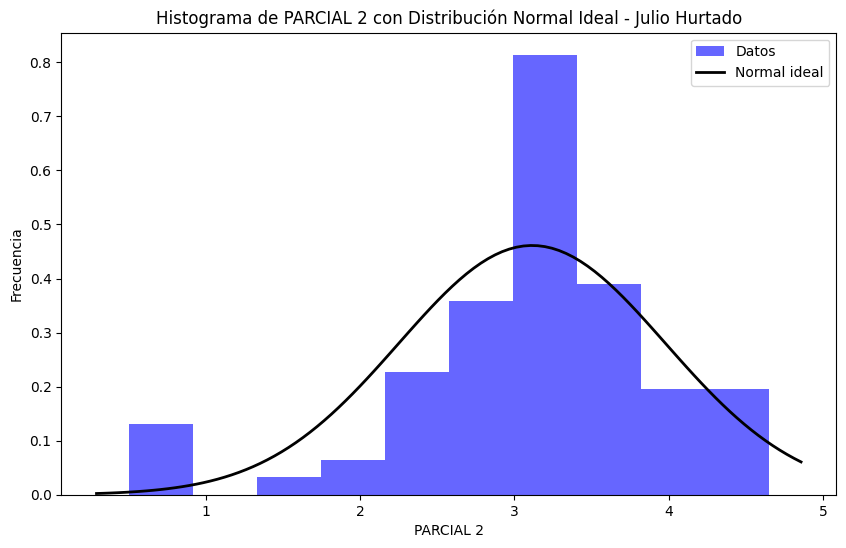

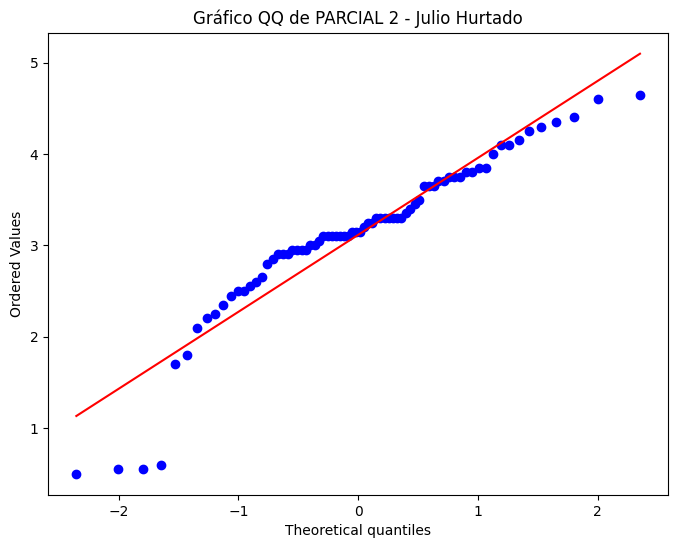

In [ ]:
# @title **Paso 10. Histograma con la distribución ideal de los Datos**
plt.figure(figsize=(10, 6))
plt.hist(datos['PARCIAL 2'].dropna(), bins=10, density=True, alpha=0.6, color='b', label='Datos')

# Fit a normal distribution to the data
mu, std = stats.norm.fit(datos['PARCIAL 2'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal ideal')

plt.title('Histograma de PARCIAL 2 con Distribución Normal Ideal - Julio Hurtado')
plt.xlabel('PARCIAL 2')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# QQ-plot
plt.figure(figsize=(8, 6))
stats.probplot(datos['PARCIAL 2'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico QQ de PARCIAL 2 - Julio Hurtado')
plt.show()

In [ ]:
# @title **Paso 11. Prueba de Normalidad Shapiro Wilks - Para el ESTATURA**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Assuming 'datos' DataFrame is already loaded as in the previous code

# Shapiro-Wilk test for 'ESTATURA'
shapiro_test = stats.shapiro(datos['ESTATURA'].dropna()) # Drop NA values
statistic = shapiro_test.statistic
p_value = shapiro_test.pvalue

print(f"Shapiro-Wilk Test for ESTATURA:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    decision = "No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal."
else:
    decision = "Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal."

print(decision)

Shapiro-Wilk Test for ESTATURA:
Statistic: 0.9822784825896896
P-value: 0.3865903180480913
No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal.


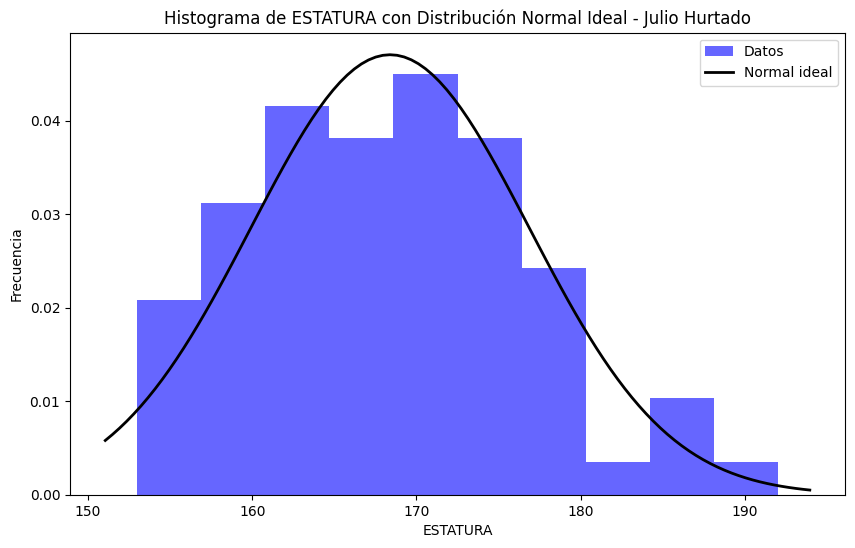

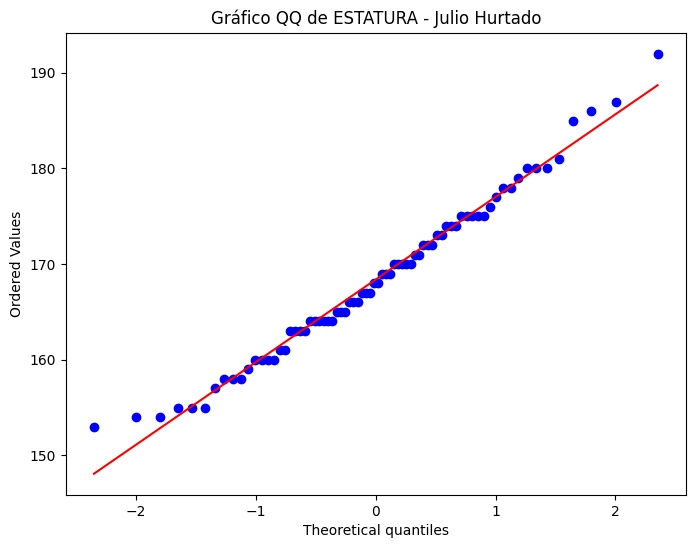

In [ ]:
# @title **Paso 12. Histograma con la distribución ideal de los Datos**
plt.figure(figsize=(10, 6))
plt.hist(datos['ESTATURA'].dropna(), bins=10, density=True, alpha=0.6, color='b', label='Datos')

# Fit a normal distribution to the data
mu, std = stats.norm.fit(datos['ESTATURA'].dropna())
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal ideal')

plt.title('Histograma de ESTATURA con Distribución Normal Ideal - Julio Hurtado')
plt.xlabel('ESTATURA')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# QQ-plot
plt.figure(figsize=(8, 6))
stats.probplot(datos['ESTATURA'].dropna(), dist="norm", plot=plt)
plt.title('Gráfico QQ de ESTATURA - Julio Hurtado')
plt.show()

In [ ]:
# @title **Paso 13. Prueba de Kolmogorov-Smirnov para PARCIAL 2**
ks_test = stats.kstest(datos['PARCIAL 2'].dropna(), 'norm')
statistic = ks_test.statistic
p_value = ks_test.pvalue

print(f"\nKolmogorov-Smirnov Test for PARCIAL 2:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    decision = "No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal."
else:
    decision = "Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal."

print(decision)


Kolmogorov-Smirnov Test for PARCIAL 2:
Statistic: 0.9013804831874029
P-value: 7.252635599758291e-75
Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal.


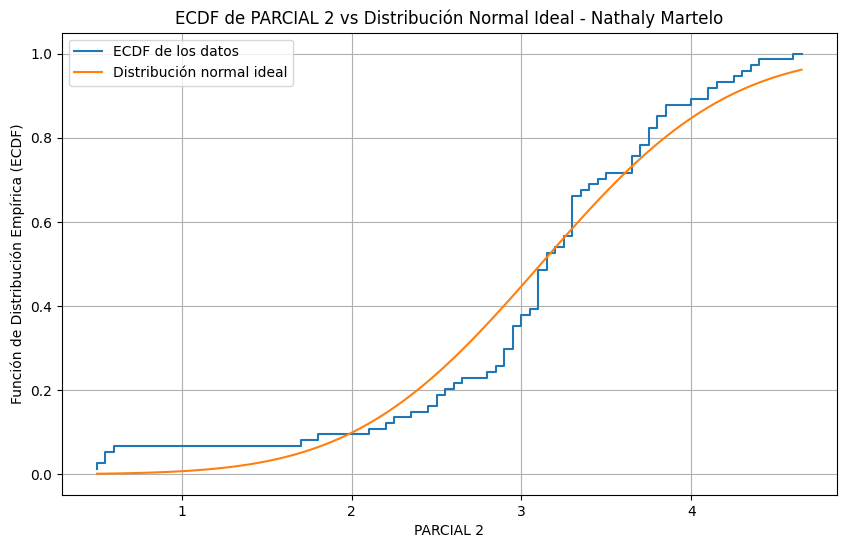

In [ ]:
# @title **Paso 14. Ojiva con la distribución ideal y la Ojiva acumulada de los Datos**

# ECDF plot with ideal normal distribution
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize=(10, 6))

# Calculate ECDF for the data
ecdf = ECDF(datos['PARCIAL 2'].dropna())
plt.step(ecdf.x, ecdf.y, label='ECDF de los datos')


# Plot the ideal normal distribution
mu, std = stats.norm.fit(datos['PARCIAL 2'].dropna())
x = np.linspace(min(datos['PARCIAL 2'].dropna()), max(datos['PARCIAL 2'].dropna()), 100)
plt.plot(x, stats.norm.cdf(x, loc=mu, scale=std), label='Distribución normal ideal')

plt.title('ECDF de PARCIAL 2 vs Distribución Normal Ideal - Nathaly Martelo')
plt.xlabel('PARCIAL 2')
plt.ylabel('Función de Distribución Empírica (ECDF)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# @title **Paso 13. Prueba de Kolmogorov-Smirnov para ESTATURA**
ks_test = stats.kstest(datos['ESTATURA'].dropna(), 'norm')
statistic = ks_test.statistic
p_value = ks_test.pvalue

print(f"\nKolmogorov-Smirnov Test for ESTATURA:")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value > alpha:
    decision = "No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal."
else:
    decision = "Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal."

print(decision)


Kolmogorov-Smirnov Test for ESTATURA:
Statistic: 1.0
P-value: 0.0
Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal.


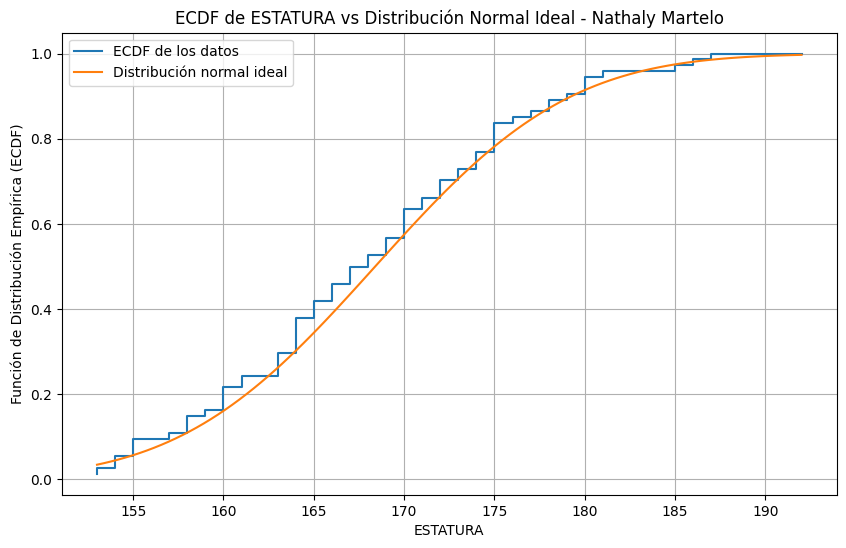

In [ ]:
# @title **Paso 14. Ojiva con la distribución ideal y la Ojiva acumulada de los Datos**

# ECDF plot with ideal normal distribution
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize=(10, 6))

# Calculate ECDF for the data
ecdf = ECDF(datos['ESTATURA'].dropna())
plt.step(ecdf.x, ecdf.y, label='ECDF de los datos')


# Plot the ideal normal distribution
mu, std = stats.norm.fit(datos['ESTATURA'].dropna())
x = np.linspace(min(datos['ESTATURA'].dropna()), max(datos['ESTATURA'].dropna()), 100)
plt.plot(x, stats.norm.cdf(x, loc=mu, scale=std), label='Distribución normal ideal')

plt.title('ECDF de ESTATURA vs Distribución Normal Ideal - Nathaly Martelo')
plt.xlabel('ESTATURA')
plt.ylabel('Función de Distribución Empírica (ECDF)')
plt.legend()
plt.grid(True)
plt.show()


Shapiro-Wilk Test for PARCIAL 2 in curso: PROBABILIDAD
Statistic: 0.9142988861136497
P-value: 0.0018823973303176346
Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal.


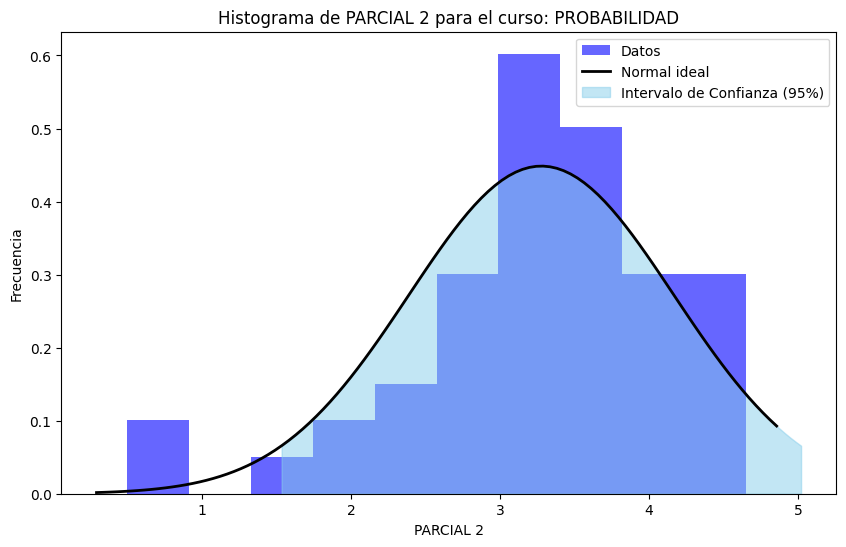

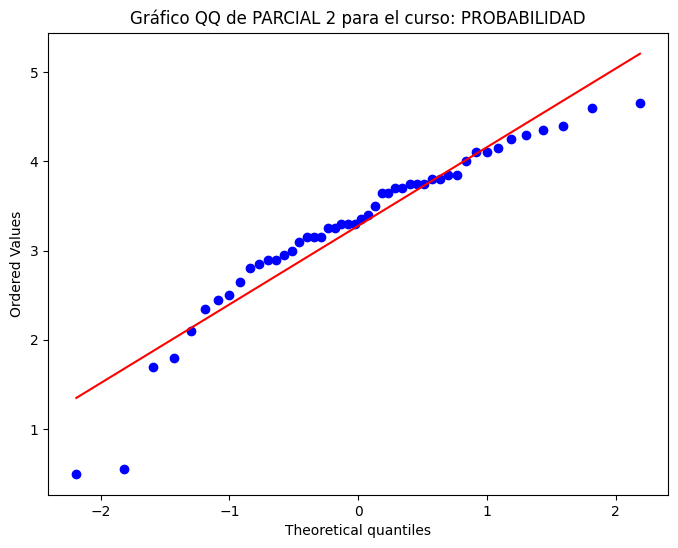

Shapiro-Wilk Test for PARCIAL 2 in curso: ESTADISTICAI
Statistic: 0.7146715315576664
P-value: 8.473954676673386e-06
Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal.


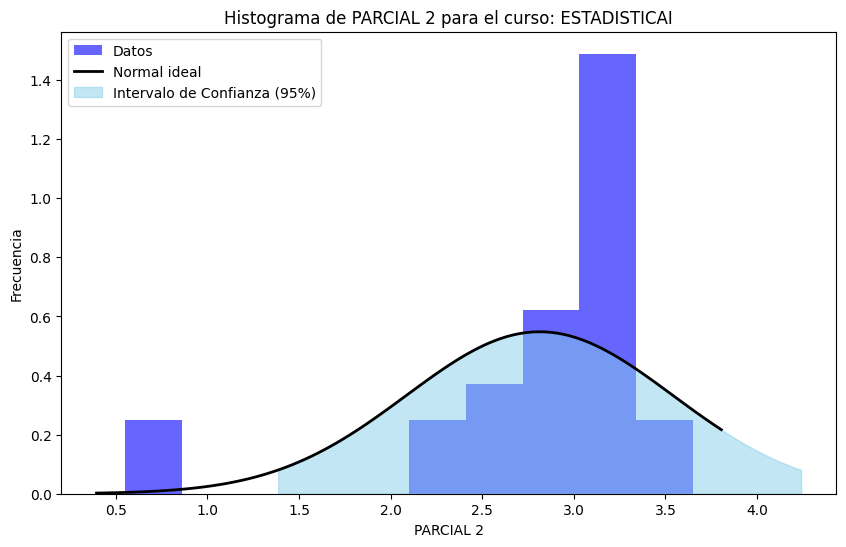

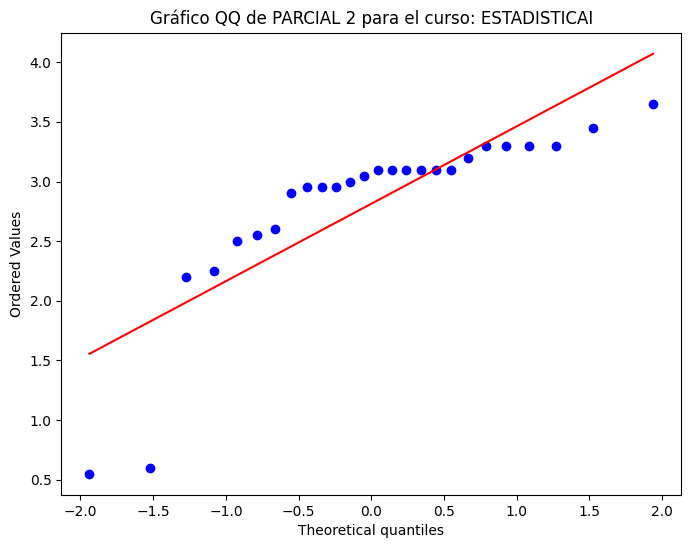

In [ ]:
# @title **Paso 15. Prueba de Shapiro-Wilk 'CURSO' vs 'PARCIAL 2'**
from scipy.stats import shapiro

for curso in datos['CURSO'].unique():
    subset = datos[datos['CURSO'] == curso]['PARCIAL 2'].dropna()
    if len(subset) >= 3:  # Shapiro-Wilk requires at least 3 data points
        shapiro_test = shapiro(subset)
        statistic = shapiro_test.statistic
        p_value = shapiro_test.pvalue

        print(f"Shapiro-Wilk Test for PARCIAL 2 in curso: {curso}")
        print(f"Statistic: {statistic}")
        print(f"P-value: {p_value}")

        alpha = 0.05
        if p_value > alpha:
            decision = "No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal."
        else:
            decision = "Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal."
        print(decision)


        # Plotting for each course
        plt.figure(figsize=(10, 6))
        plt.hist(subset, bins=10, density=True, alpha=0.6, color='b', label='Datos')
        mu, std = stats.norm.fit(subset)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2, label='Normal ideal')
        plt.title(f'Histograma de PARCIAL 2 para el curso: {curso}')
        plt.xlabel('PARCIAL 2')
        plt.ylabel('Frecuencia')
        plt.legend()

        #Shaded regions
        # Calculate the confidence interval
        confidence_interval = stats.norm.interval(0.95, loc=mu, scale=std) #95% confidence

        # Plot the confidence interval as a shaded region
        x_ci = np.linspace(confidence_interval[0], confidence_interval[1], 100)
        p_ci = stats.norm.pdf(x_ci, mu, std)
        plt.fill_between(x_ci, p_ci, color='skyblue', alpha=0.5, label='Intervalo de Confianza (95%)')
        plt.legend()

        plt.show()

        #QQplot
        plt.figure(figsize=(8, 6))
        stats.probplot(subset, dist="norm", plot=plt)
        plt.title(f'Gráfico QQ de PARCIAL 2 para el curso: {curso}')
        plt.show()

    else:
        print(f"No se puede realizar la prueba de Shapiro-Wilk para el curso {curso} (menos de 3 datos).")

Shapiro-Wilk Test for ESTATURA in curso: PROBABILIDAD
Statistic: 0.9800982142079186
P-value: 0.5827892978314216
No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal.


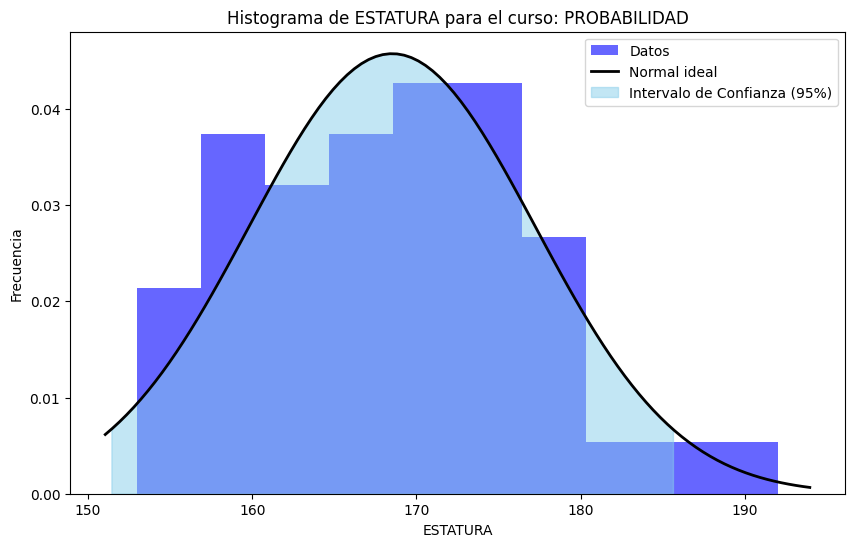

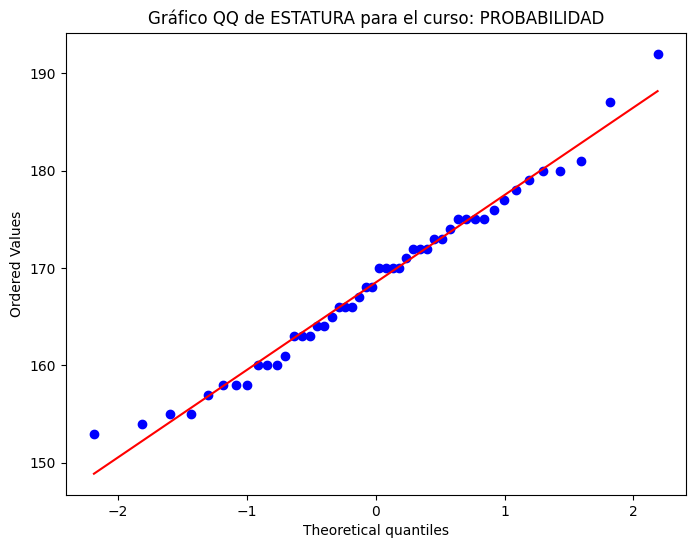

Shapiro-Wilk Test for ESTATURA in curso: ESTADISTICAI
Statistic: 0.9628296521793366
P-value: 0.45027349166624314
No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal.


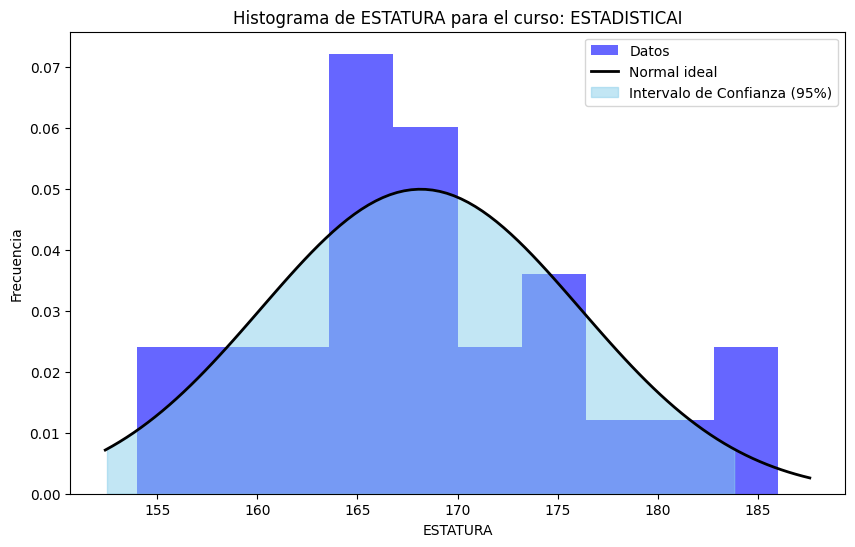

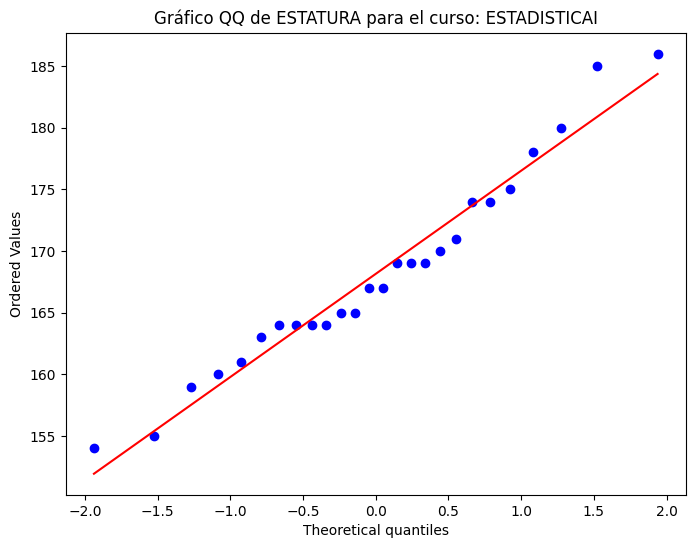

In [ ]:
# @title **Paso 15. Prueba de Shapiro-Wilk 'CURSO' vs 'ESTATURA'**
from scipy.stats import shapiro

for curso in datos['CURSO'].unique():
    subset = datos[datos['CURSO'] == curso]['ESTATURA'].dropna()
    if len(subset) >= 3:  # Shapiro-Wilk requires at least 3 data points
        shapiro_test = shapiro(subset)
        statistic = shapiro_test.statistic
        p_value = shapiro_test.pvalue

        print(f"Shapiro-Wilk Test for ESTATURA in curso: {curso}")
        print(f"Statistic: {statistic}")
        print(f"P-value: {p_value}")

        alpha = 0.05
        if p_value > alpha:
            decision = "No se rechaza la hipótesis nula. Los datos parecen provenir de una distribución normal."
        else:
            decision = "Se rechaza la hipótesis nula. Los datos no parecen provenir de una distribución normal."
        print(decision)


        # Plotting for each course
        plt.figure(figsize=(10, 6))
        plt.hist(subset, bins=10, density=True, alpha=0.6, color='b', label='Datos')
        mu, std = stats.norm.fit(subset)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2, label='Normal ideal')
        plt.title(f'Histograma de ESTATURA para el curso: {curso}')
        plt.xlabel('ESTATURA')
        plt.ylabel('Frecuencia')
        plt.legend()

        #Shaded regions
        # Calculate the confidence interval
        confidence_interval = stats.norm.interval(0.95, loc=mu, scale=std) #95% confidence

        # Plot the confidence interval as a shaded region
        x_ci = np.linspace(confidence_interval[0], confidence_interval[1], 100)
        p_ci = stats.norm.pdf(x_ci, mu, std)
        plt.fill_between(x_ci, p_ci, color='skyblue', alpha=0.5, label='Intervalo de Confianza (95%)')
        plt.legend()

        plt.show()

        #QQplot
        plt.figure(figsize=(8, 6))
        stats.probplot(subset, dist="norm", plot=plt)
        plt.title(f'Gráfico QQ de ESTATURA para el curso: {curso}')
        plt.show()

    else:
        print(f"No se puede realizar la prueba de Shapiro-Wilk para el curso {curso} (menos de 3 datos).")